<h1>Predict the first Innings score in a ODI</h1>

<h3>1. Importing useful Library and Dataset</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('odi.csv')

In [3]:
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301
5,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.6,6,0,0,0,301
6,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.1,6,0,0,0,301
7,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.2,6,0,0,0,301
8,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,6,0,1.3,6,0,0,0,301
9,1,2006-06-13,"Civil Service Cricket Club, Stormont",England,Ireland,EC Joyce,D Langford-Smith,7,0,1.3,7,0,0,0,301


In [4]:
data.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
350894,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.2,39,0,59,18,203
350895,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.3,39,0,59,18,203
350896,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,201,8,49.4,38,0,59,18,203
350897,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,DAS Gunaratne,TL Chatara,202,8,49.5,38,0,59,18,203
350898,1188,2017-07-10,Mahinda Rajapaksa International Cricket Stadiu...,Sri Lanka,Zimbabwe,PVD Chameera,TL Chatara,203,8,49.6,38,0,59,18,203


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


<h4>2. Grouping Data</h4>

In [3]:
x=data.groupby(['bat_team']).mean()
X=sorted(list(set(data['bat_team'])))
x

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
bat_team,,,,,,,,,
Afghanistan,963.248546,103.719725,3.383792,23.731491,21.510709,0.731359,28.062136,9.176758,231.294685
Asia XI,192.995717,150.514989,3.304069,24.731049,29.556745,0.614561,37.946467,17.165953,328.396146
Australia,523.393997,122.956547,2.765866,24.468990,24.985360,0.615786,38.055553,13.551163,274.583853
Bangladesh,625.695530,105.383375,3.246617,23.786136,21.526441,0.717502,31.168087,10.926650,232.174770
Bermuda,216.027715,86.493213,4.113688,23.318778,17.887443,0.809955,23.351244,8.651018,189.269796
Canada,501.073150,94.619701,3.482959,22.537781,19.535328,0.836658,25.301746,7.400665,198.460931
England,585.947424,120.585727,2.826558,24.094214,24.647837,0.659172,36.141207,12.912674,266.261576
Hong Kong,1063.858705,100.560976,3.277544,24.121531,21.099243,0.708158,28.269975,7.851135,226.456686
India,552.437117,125.675789,2.745297,24.192921,25.444026,0.611036,40.690923,14.656827,277.261732


<h3>Bar Graph</h3>

Text(0.5, 1.0, 'Bar Graph Countries v/s Average Score')

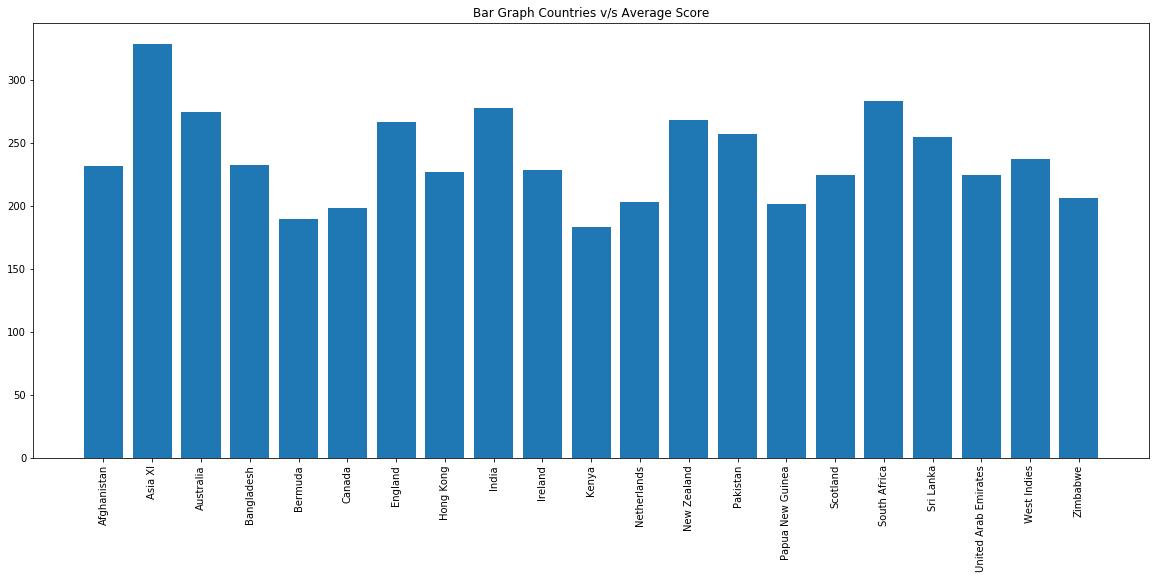

In [7]:
y=x['total']
plt.figure(figsize=(20,8))
plt.xticks(rotation='vertical')
plt.bar(X,y)
plt.title('Bar Graph Countries v/s Average Score')

<h4>Selecting Relevant Columns</h4>

In [8]:
X=data.iloc[:,[7,8,9,12,13]].values
y=data.iloc[:, 14].values

<h4>Splitting Data</h4>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

<h4>Scaling</h4>

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h4>Train model using Linear Regression</h4>

In [12]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
pred=lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Predicted Score according to given data : ",pred)

R-squared value: 52.737657811129445
Custom accuracy: 43.354801937874036
Predicted Score according to given data :  [322.42983935]


<h4>Train model using Random Forest</h4>

In [14]:
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
pred=lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Predicted Score according to given data : ",pred)

R-squared value: 79.5179070762599
Custom accuracy: 77.1057281276717
Predicted Score according to given data :  [315.71]


<h4>Train model using Decision Tree</h4>

In [16]:
from sklearn.tree import DecisionTreeRegressor
lin = DecisionTreeRegressor()
lin.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [17]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))
pred=lin.predict(sc.transform(np.array([[100,0,13,50,50]])))
print("Predicted Score according to given data : ",pred)

R-squared value: 67.66522989345076
Custom accuracy: 78.69934454260473
Predicted Score according to given data :  [303.]
